# Digit Recognizer: Machine Learning from Kaggle Competition

My name is André Fernandes and in this notebook is presented my solution proposal for the competition.
Feel free to connect with me on LinkedIn and check out my other projects on GitHub:
- [LinkedIn](https://www.linkedin.com/in/andré-fernandes-868006207/)
- [GitHub](https://github.com/vBarFace)

Below is the description of the competition and the link to the main page if you want to check it for yourself.

## Competition Description
The Digit Recognizer competition is a classic machine learning task to recognize handwritten digits. This notebook will guide you through the process of building a predictive model that identifies digits from images.

This competition is hosted on [Kaggle](https://www.kaggle.com/competitions/digit-recognizer/overview).

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Description](#Data-Description)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
4. [Data Preprocessing](#Data-Preprocessing)
5. [Modeling](#Modeling)
6. [Model Evaluation](#Model-Evaluation)
7. [Conclusion](#Conclusion)
8. [References](#References)

## Introduction
The Digit Recognizer dataset is a collection of handwritten digits widely used in machine learning. This notebook aims to develop a model that accurately identifies digits based on pixel values.

## Data Description
The dataset consists of two files:
- train.csv: The training dataset containing images of digits and their corresponding labels
- test.csv: The test dataset for which predictions need to be made

### Data Dictionary
- **pixel0** to **pixel783**: Pixel values (0 to 255) representing the grayscale intensity of the digit image
- **label**: The digit (0-9) corresponding to the image

## Exploratory Data Analysis (EDA)
In this section, we will explore the dataset to understand the distribution of pixel values and visualize relationships between features.

## Data Preprocessing
Data preprocessing steps include:
- Normalizing pixel values
- Reshaping data for modeling
- Handling missing or corrupted images (if any)
- Encoding categorical variables (if any)

## Modeling
We will build a neural network model to predict the digit from images. Models to consider include:
- Convolutional Neural Network (CNN)

## Model Evaluation
Evaluation metrics such as accuracy, precision, recall, and F1-score will be used to assess the performance of the models. Cross-validation will be employed to validate the robustness of the models.

## Conclusion
Summarize the findings from EDA, preprocessing, and modeling sections. Discuss the performance of different models and suggest potential improvements.

## References
- Kaggle Digit Recognizer Competition: [Kaggle Digit Recognizer Competition](https://www.kaggle.com/competitions/digit-recognizer/overview)
- ChatGPT

# ----- Beginning of my Solution Proposal -----
###### Usage:
Create a folder named "Digit_Recognizer" and get the "digit-recognizer" folder (given by kaggle that is the dataset) inside of "Digit_Recognizer". If you need to do some installs, create a cell bellow this one and install whats needed :)

### Imports

In [4]:
# Manipulate data
import numpy as np
import pandas as pd
# For math operations
import math
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For data processing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Model Building
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# For model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
# For model load
import os
from tensorflow.keras.models import load_model
import json

### Get the data

In [6]:
# Lets get the training data
training_data = pd.read_csv("../Digit_Recognizer/digit-recognizer/train.csv")
test_data = pd.read_csv("../Digit_Recognizer/digit-recognizer/test.csv")

### Lets performe exploratory Data Analysis (EDA) & Data Preprocessing

In [8]:
# Lets see some information of the training set data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
# Lets see the shape
n_images, n_pixeis = training_data.shape
# Info of the images
n_pixeis = n_pixeis - 1
height = int(math.sqrt(n_pixeis))
width = int(math.sqrt(n_pixeis))
n_channels = 1
print(f"There are {n_images} images, each with {n_pixeis} pixeis, making them {height}x{width}.\nEach image is gay scale, only having {n_channels} channel.")

There are 42000 images, each with 784 pixeis, making them 28x28.
Each image is gay scale, only having 1 channel.


In [10]:
# Lets separate pixeis and labels
images = training_data.drop('label', axis=1)
labels = training_data['label']
print("Lets see some labels:")
labels.head()

Lets see some labels:


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [11]:
# Lets normalize the values
images = images.values/255 # We use .values to go from pandas to numpy
test_data = test_data.values/255 # We use .values to go from pandas to numpy

# Lets reshape each row so we have real images
images = images.reshape(-1, 28, 28, 1)
test_data = test_data.reshape(-1, 28, 28, 1)

print("The shape of images for training: ", images.shape)
print("The shape of images for submission: ", test_data.shape)

The shape of images for training:  (42000, 28, 28, 1)
The shape of images for submission:  (28000, 28, 28, 1)


In [12]:
# Check for Null values
nan_values_images = np.isnan(images)
nan_count_images = np.sum(nan_values_images)
print("NaN values count in images for training:", nan_count_images)

# Check for inf values in images
inf_values_images = np.isinf(images)
inf_count_images = np.sum(inf_values_images)
print("Infinite values count in images for training:", inf_count_images)

NaN values count in images for training: 0
Infinite values count in images for training: 0


In [13]:
# Check for Null values
nan_values_images = np.isnan(test_data)
nan_count_images = np.sum(nan_values_images)
print("NaN values count in images for submission:", nan_count_images)

# Check for inf values in images
inf_values_images = np.isinf(test_data)
inf_count_images = np.sum(inf_values_images)
print("Infinite values count in images for submission:", inf_count_images)

NaN values count in images for submission: 0
Infinite values count in images for submission: 0


In [14]:
# Function to see some images
def plot_images(images, labels, n_images):
    
    fig, axes = plt.subplots(1, n_images, figsize=(15, 5))  # Adjust figsize as needed

    for i in range(n_images):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(labels[i], fontsize=12)  # Set label as title

    plt.tight_layout()
    plt.show()

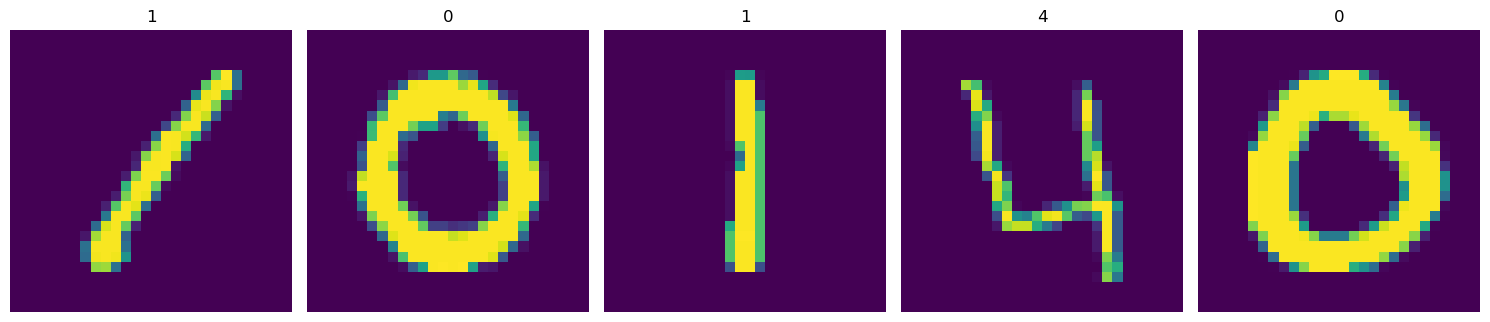

In [15]:
# Lets see some images
n_images = 5
plot_images(images, labels, n_images)

In [16]:
# Function to see pixel intensity distribution
def plot_pixel_intensity_histograms(images, labels, n_images):
    fig, axes = plt.subplots(1, n_images, figsize=(15, 5))  # Adjust figsize as needed

    for i in range(n_images):
        pixel_values = images[i].flatten()  # Flatten image to 1D array
        sns.histplot(pixel_values, bins=50, kde=True, ax=axes[i], color='blue', alpha=0.7)
        axes[i].set_title(labels[i], fontsize=12)  # Set label as title
        axes[i].set_xlabel('Pixel Intensity')
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

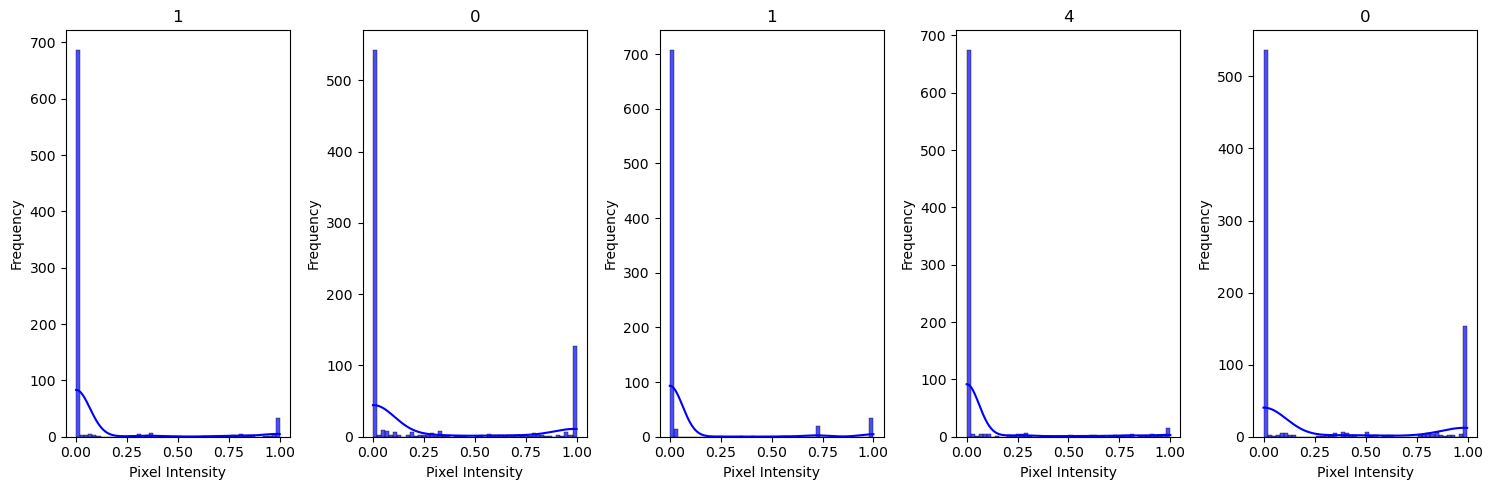

In [17]:
# Lets see if there is any noise
plot_pixel_intensity_histograms(images, labels, n_images)

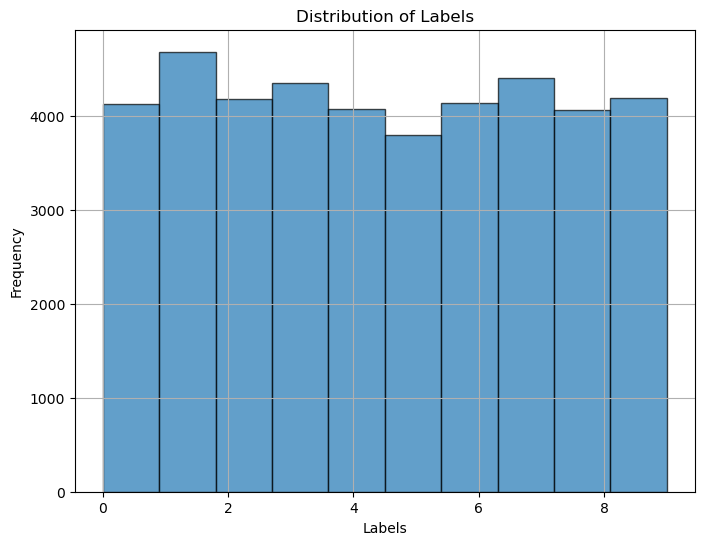

In [18]:
# Lets see the labels distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=len(set(labels)), edgecolor='black', alpha=0.7)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.grid(True)
plt.show()

In [19]:
# Lets encode the labels so ou model can handle it
labels_encoded = to_categorical(labels)
print("Some of the encoded labels: \n", labels_encoded)

Some of the encoded labels: 
 [[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Modeling

In [21]:
#Split training and validation set. Lets make a 90% for training and 10% for validation
X_train, X_val, Y_train, Y_val = train_test_split(images, labels_encoded, test_size=0.1)

print("Shape of X_train = ", X_train.shape)
print("Shape of Y_train = ", Y_train.shape)

print("\nShape of X_val = ", X_val.shape)
print("Shape of Y_val = ", Y_val.shape)

Shape of X_train =  (37800, 28, 28, 1)
Shape of Y_train =  (37800, 10)

Shape of X_val =  (4200, 28, 28, 1)
Shape of Y_val =  (4200, 10)


In [22]:
# Lets define a model
model = Sequential([
    # Lets define the Input
    Input(shape=(height, width, n_channels)),
    
    # Lets Define the first block
    Conv2D(64, kernel_size=(3, 3), padding='same', strides=(1, 1)),
    BatchNormalization(),
    Activation('relu'),
    
    # Lets Define the Second block
    Conv2D(64, kernel_size=(3, 3), padding='same', strides=(1, 1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Lets Define the third block
    Conv2D(128, kernel_size=(3, 3), padding='same', strides=(1, 1)),
    BatchNormalization(),
    Activation('relu'),
    
    # Lets Define the fourth block
    Conv2D(128, kernel_size=(3, 3), padding='same', strides=(1, 1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Lets Define the fifth block
    Conv2D(256, kernel_size=(3, 3), padding='same', strides=(1, 1)),
    BatchNormalization(),
    Activation('relu'),
    
    # Lets Define the sixth block
    Conv2D(256, kernel_size=(3, 3), padding='same', strides=(1, 1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Now lets make it from 2D to 1D
    Flatten(),

    # First block in 1D
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Second block in 1D
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Define the final output
    Dense(10, activation='softmax')
])

model.summary()

# Define for train
n_epoches = 100
batch_size = 32

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 7, 7, 256)      │             

 Total params: 2,599,882 (9.92 MB)

 Trainable params: 2,596,042 (9.90 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [23]:
# Check if a pre-trained model exists
if os.path.exists('CNN_Digit_Recognizer_Kaggle.keras'):
    # Load the pre-trained model
    model = load_model('CNN_Digit_Recognizer_Kaggle.keras')
    print("Pre-trained model loaded.")

    # Load the training history
    if os.path.exists('training_history.json'):
        with open('training_history.json', 'r') as f:
            history_loaded = json.load(f)
            history = None
    else:
        history_loaded = None

else:
    # Lets compile
    model.compile(
        optimizer = 'adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Lets fit the model
    history =  model.fit(
        X_train,
        Y_train,
        validation_data=(X_val, Y_val),
        epochs = n_epoches,
        batch_size= batch_size,
        callbacks = [ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00000001), 
                     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
    )

    # Save the trained model (if training new model)
    model.save('CNN_Digit_Recognizer_Kaggle.keras')
    print("CNN trained and saved.")

    # Save the history
    with open('training_history.json', 'w') as f:
        json.dump(history.history, f)

Epoch 1/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 143s 115ms/step - accuracy: 0.8413 - loss: 0.4985 - val_accuracy: 0.9776 - val_loss: 0.0754 - learning_rate: 0.0010
Epoch 2/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 138s 117ms/step - accuracy: 0.9746 - loss: 0.0823 - val_accuracy: 0.9860 - val_loss: 0.0503 - learning_rate: 0.0010
Epoch 3/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 141s 119ms/step - accuracy: 0.9802 - loss: 0.0671 - val_accuracy: 0.9895 - val_loss: 0.0348 - learning_rate: 0.0010
Epoch 4/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 143s 121ms/step - accuracy: 0.9812 - loss: 0.0616 - val_accuracy: 0.9836 - val_loss: 0.0620 - learning_rate: 0.0010
Epoch 5/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 143s 121ms/step - accuracy: 0.9823 - loss: 0.0587 - val_accuracy: 0.9895 - val_loss: 0.0314 - learning_rate: 0.0010
Epoch 6/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 154s 130ms/step - accuracy: 0.9851 - loss: 0.0486 - val_accuracy: 0.9902 - val_loss: 0.0308 - learning_rate: 0.0010
Epoch 7/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 154

### Evaluate

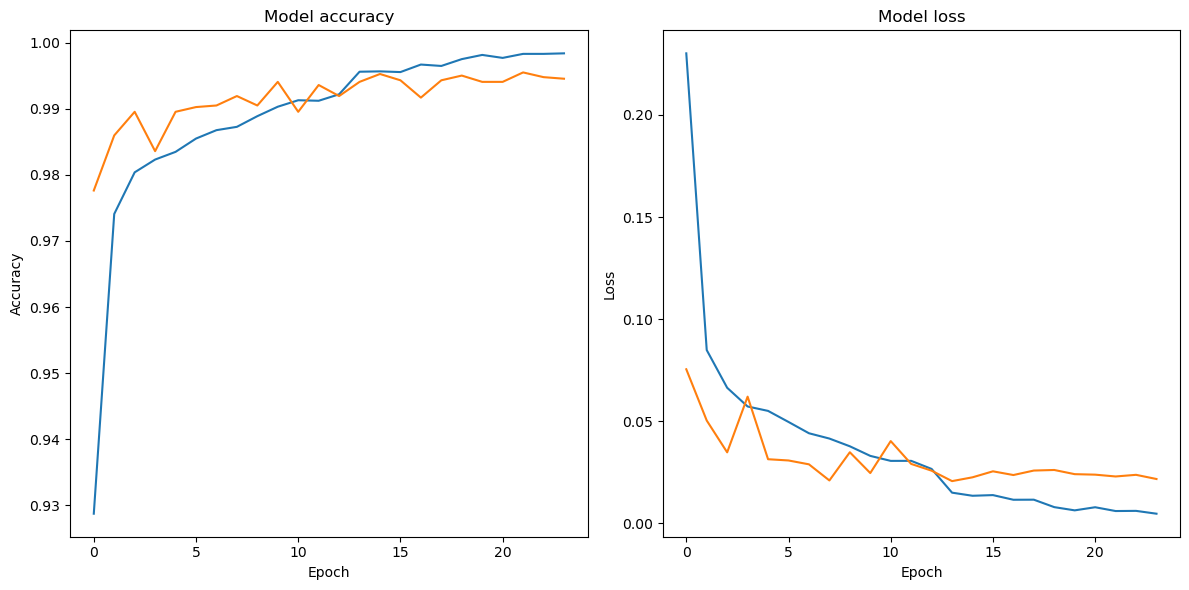

In [25]:
if history:
    # Plot the training and validation accuracy and loss
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(history.history['accuracy'], label='train accuracy')
    ax[0].plot(history.history['val_accuracy'], label='val accuracy')
    ax[0].set_title('Model accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    
    ax[1].plot(history.history['loss'], label='train loss')
    ax[1].plot(history.history['val_loss'], label='val loss')
    ax[1].set_title('Model loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    
    plt.tight_layout()
    plt.show()

else:
    # Plot the training and validation accuracy and loss
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(history_loaded['accuracy'], label='train accuracy')
    ax[0].plot(history_loaded['val_accuracy'], label='val accuracy')
    ax[0].set_title('Model accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    
    ax[1].plot(history_loaded['loss'], label='train loss')
    ax[1].plot(history_loaded['val_loss'], label='val loss')
    ax[1].set_title('Model loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    
    plt.tight_layout()
    plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step


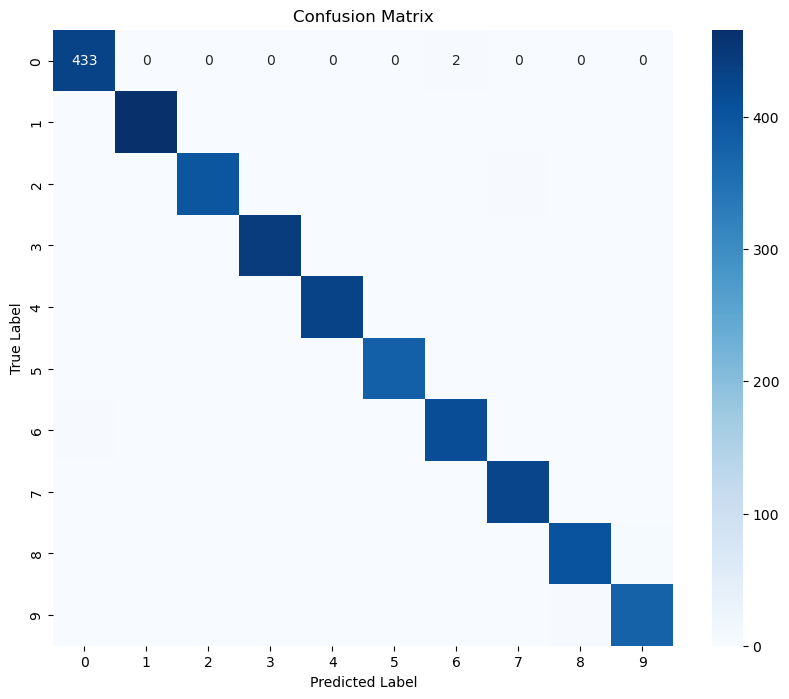

In [26]:
# Lets make a prediction
pred = model.predict(X_val)
# Transforme the variables so we can pass them to confuion amtrix
pred = np.argmax(pred, axis=1)
Y_val_true = np.argmax(Y_val, axis=1)
# Lets get the confusion matrix
conf_matrix = confusion_matrix(Y_val_true, pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Submission

In [28]:
#Predict and Submit results
pred_submition = model.predict(test_data)
# Transforme the variables so we can submit them
pred_submition = np.argmax(pred_submition, axis=1)

output = pd.DataFrame({'ImageId': list(range(1, len(pred_submition) + 1)), 'Label': pred_submition})
output.to_csv('submission_CNN.csv', index=False)
print("Your submission was successfully saved!")

875/875 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step
Your submission was successfully saved!


### Lets apply some data augmentation to see the diferences

In [30]:
# Check if a pre-trained model exists
if os.path.exists('CNN_DataAug_Digit_Recognizer_Kaggle.keras'):
    # Load the pre-trained model
    model = load_model('CNN_DataAug_Digit_Recognizer_Kaggle.keras')
    print("Pre-trained model loaded.")

    # Load the training history
    if os.path.exists('training_history_AugData.json'):
        with open('training_history_AugData.json', 'r') as f:
            history_loaded_aug = json.load(f)
            history_aug = None
    else:
        history_loaded_aug = None

else:

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    #Data augmentation
    data_augmentation = ImageDataGenerator(
        rotation_range=5,  
        zoom_range=0.3, 
        width_shift_range=0.1, height_shift_range=0.1, channel_shift_range=0.1,
        shear_range=0.3, 
    )
    
    data_augmentation.fit(X_train)

    # Lets train the model with data augmentation
    history_aug =  model.fit(
        data_augmentation.flow(X_train, Y_train, batch_size=batch_size),
        validation_data=(X_val, Y_val),
        epochs = n_epoches,
        callbacks = [ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00000001), 
                     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
    )

    # Save the trained model (if training new model)
    model.save('CNN_DataAug_Digit_Recognizer_Kaggle.keras')
    print("CNN with DataAugmentation trained and saved.")

    # Save the history
    with open('training_history_AugData.json', 'w') as f:
        json.dump(history_aug.history, f)

Epoch 1/100
   1/1182 ━━━━━━━━━━━━━━━━━━━━ 2:21:23 7s/step - accuracy: 0.9062 - loss: 0.2634

C:\Users\andre\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1182/1182 ━━━━━━━━━━━━━━━━━━━━ 157s 127ms/step - accuracy: 0.9644 - loss: 0.1387 - val_accuracy: 0.9902 - val_loss: 0.0374 - learning_rate: 0.0010
Epoch 2/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 149s 126ms/step - accuracy: 0.9807 - loss: 0.0695 - val_accuracy: 0.9888 - val_loss: 0.0388 - learning_rate: 0.0010
Epoch 3/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 149s 126ms/step - accuracy: 0.9830 - loss: 0.0568 - val_accuracy: 0.9898 - val_loss: 0.0341 - learning_rate: 0.0010
Epoch 4/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 150s 127ms/step - accuracy: 0.9852 - loss: 0.0546 - val_accuracy: 0.9948 - val_loss: 0.0213 - learning_rate: 0.0010
Epoch 5/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 149s 126ms/step - accuracy: 0.9852 - loss: 0.0490 - val_accuracy: 0.9938 - val_loss: 0.0207 - learning_rate: 0.0010
Epoch 6/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 150s 127ms/step - accuracy: 0.9872 - loss: 0.0435 - val_accuracy: 0.9938 - val_loss: 0.0238 - learning_rate: 0.0010
Epoch 7/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step -

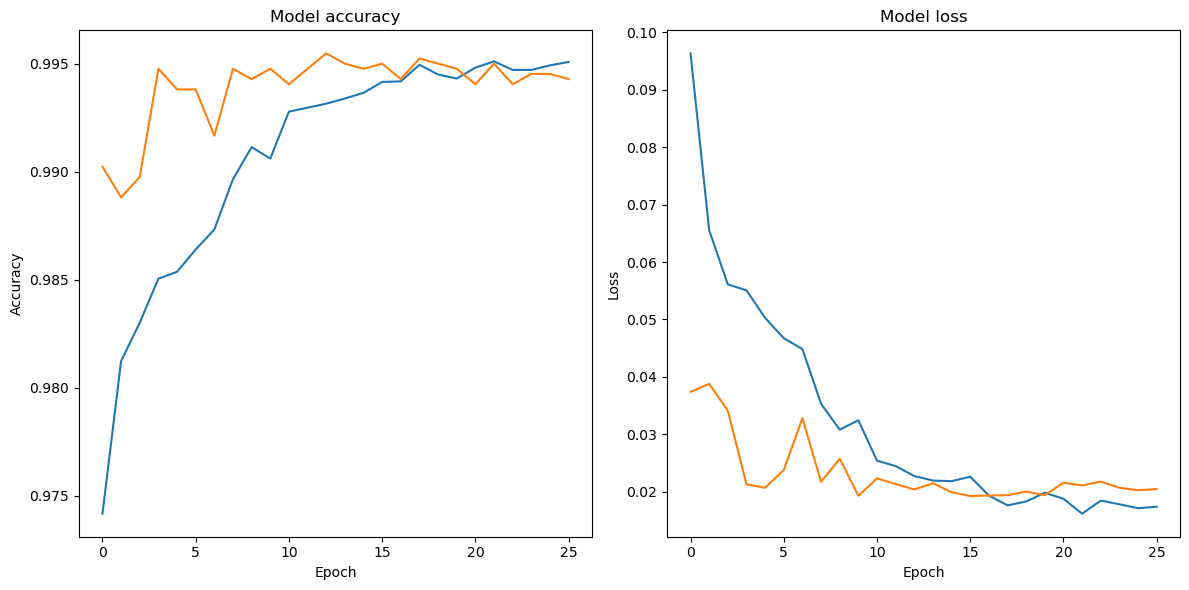

In [31]:
if history_aug:
    # Plot the training and validation accuracy and loss
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(history_aug.history['accuracy'], label='train accuracy')
    ax[0].plot(history_aug.history['val_accuracy'], label='val accuracy')
    ax[0].set_title('Model accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    
    ax[1].plot(history_aug.history['loss'], label='train loss')
    ax[1].plot(history_aug.history['val_loss'], label='val loss')
    ax[1].set_title('Model loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    
    plt.tight_layout()
    plt.show()

else:
    # Plot the training and validation accuracy and loss
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(history_loaded_aug['accuracy'], label='train accuracy')
    ax[0].plot(history_loaded_aug['val_accuracy'], label='val accuracy')
    ax[0].set_title('Model accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    
    ax[1].plot(history_loaded_aug['loss'], label='train loss')
    ax[1].plot(history_loaded_aug['val_loss'], label='val loss')
    ax[1].set_title('Model loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    
    plt.tight_layout()
    plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step


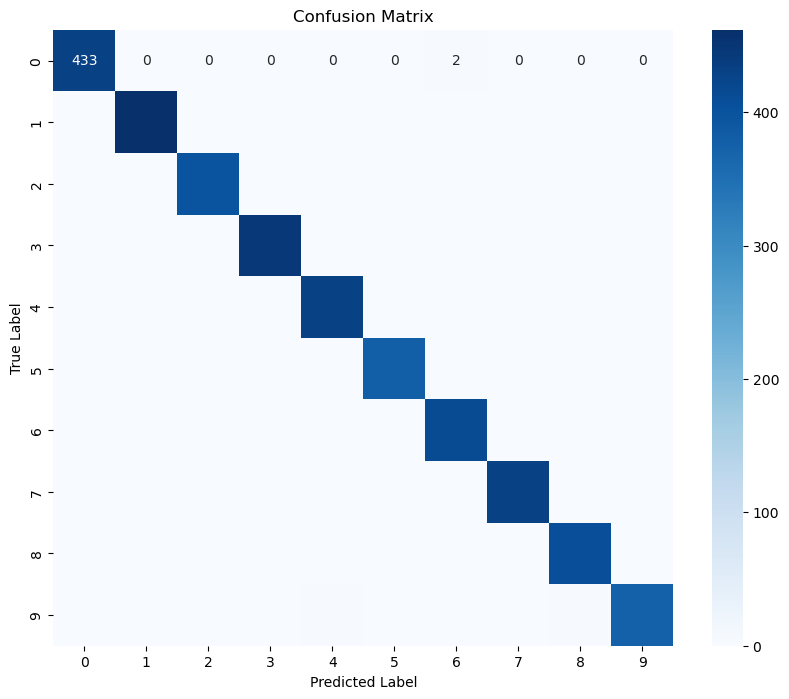

In [32]:
# Lets make a prediction
pred_aug = model.predict(X_val)
# Transforme the variables so we can pass them to confuion matrix
pred_aug = np.argmax(pred_aug, axis=1)
Y_val_true_aug = np.argmax(Y_val, axis=1)
# Lets get the confusion matrix
conf_matrix_aug = confusion_matrix(Y_val_true_aug, pred_aug)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_aug, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
#Predict and Submit results
pred_submition_augData = model.predict(test_data)

# Transforme the variables so we can submit them
pred_submition_augData = np.argmax(pred_submition_augData, axis=1)

output = pd.DataFrame({'ImageId': list(range(1, len(pred_submition_augData) + 1)), 'Label': pred_submition_augData})
output.to_csv('submission_CNN_AugData.csv', index=False)
print("Your submission was successfully saved!")

875/875 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step
Your submission was successfully saved!
